$$
-D \frac{\partial}{\partial x} \left( (1 - x^2) \frac{\partial T}{\partial x} \right) = -I(x) + Q S(x) a(x, x_s)
$$


In [2]:
def a_tilde(x, delta, it = 100):
    sum = 1
    for n in range(1, it):
        a_2n = 1
        for i in range(0,n):
            a_2n *= ((2*i)*(2*i+1)+delta)/((2*i+1)*(2*i+2))
        sum += a_2n*x**(2*n)
    return sum

a_tilde(0.86, 4.833, it = 100)

5.999309679723736

In [3]:
def a_tilde_x(x, delta, it = 100):
    sum = 0
    for n in range(1, it):
        a_2n = 1
        for i in range(0,n):
            a_2n *= ((2*i)*(2*i+1)+delta)/((2*i+1)*(2*i+2))
        sum += a_2n*(2*n)*x**(2*n-1)
    return sum

a_tilde_x(0.86, 4.833, it = 100)

32.707881224215534

In [108]:
def b_tilde(x, delta, it = 100):
    sum = 1
    for n in range(1,it):
        b_n = 1
        for i in range(0,n):
            #b_n *= (i*(i+1) + delta)/(2*(n + 1)**2)
            b_n *= ((2*i)*(2*i+1)+delta)/(2*(2*i+1)**2)
        sum += b_n*(1-x)**n
    return sum

b_tilde(0.86, 4.833, it = 1000)

1.3689389217517651

In [109]:
def b_tilde_x(x, delta, it = 100):
    sum = 0
    for n in range(1,it):
        b_n = 1
        for i in range(0,n):
            #b_n *= (i*(i+1) + delta)/(2*(n + 1)**2)
            b_n *= ((2*i)*(2*i+1)+delta)/(2*(2*i+1)**2)
        sum += b_n*n*(1-x)**(n-1)
    return sum

b_tilde_x(0.86, 4.833, it = 100)

2.8703145137922452

## $Q(x_s) frfr$

$\tilde{a} = (1 + \sum a_{2n}x^{2n})$, $\tilde{b} = (1 + \sum b_{n}x^{n})$

$$
T_L(x) = T_L^P(x) + \alpha_0 \tilde{a}
$$

$$
T_U(x) = T_U^P(x) + \beta_0 \tilde{b}
$$

$x = x_s \ \ \rightarrow T_L = T_U$, $T_{L,x} = T_{U_x}$

$$
T_L^P(x) + \alpha_0 \tilde{a} = T_U(x) = T_U^P(x) + \alpha_0 \tilde{b} 
$$

$$
T_{U,x}^P + \alpha_0 \tilde{b}_x = T_{U,x}^P + \beta_0 \tilde{b}_x
$$

$\iff$

$$
\begin{bmatrix} \tilde{a} & -\tilde{b} \\ \tilde{a}_x & -\tilde{b}_x \end{bmatrix} 
\begin{bmatrix} \alpha_0  \\ \beta_0 \end{bmatrix} = 
\begin{bmatrix} T_U - T_L  \\ T_{U,x} - T_{L,x} \end{bmatrix}
$$

In [6]:
import numpy as np

In [20]:
S2 = -0.477
B = 1.45
A = 201.4
D = 0.3
a_L = 0.68
a_U = 0.38
del_a = a_U-a_L

In [21]:
def S(x):
    return 1 + S2*0.5*(3*x**2-1)

In [132]:
def del_T_p(x, B, S2, D):
    # devided by Q
    return del_a * (1 / B + (S2 / ( 6 * D + B)) * 0.5 * (3 * x**2 -1))

def del_T_p_x(x,B,S2, D):
    # devided by Q
    return del_a * S2 * 3 * x / (6 * D + B)


def Q_xs(xs_arr):
    
    Q_xs_arr = np.zeros(len(xs_arr))
    T = np.zeros((len(xs_arr),len(xs_arr)))

    for j in range(len(xs_arr)):

        a_tild = a_tilde(xs_arr[j], B / D)
        a_tild_x = a_tilde_x(xs_arr[j], B / D)
        b_tild = b_tilde(xs_arr[j], B / D)
        b_tild_x = b_tilde_x(xs_arr[j], B / D)

        del_T_p_vec = np.array([del_T_p(xs_arr[j], B, S2, D), del_T_p_x(xs_arr[j], B, S2, D)])
        A_tilde = np.array([[-a_tild, -b_tild], # hva faen
                    [a_tild_x, -b_tild_x]])

        # get alpha_0/Q and beta_0/Q
        alpha_beta_0 = np.linalg.solve(A_tilde, del_T_p_vec)
        Q_xs_arr[j] = (A / B) / (a_L / B + S2 * a_L * 0.5 * (3 * xs_arr[j]**2 - 1) / (B + 6 * D) + alpha_beta_0[0] * a_tild)

        T[:j] = Q_xs_arr[j]*(a_L/B + (S2*a_L/(6*D+B))*0.5*(3*xs_arr**2-1) + alpha_beta_0[0]*a_tild)-A/B
    
    return [Q_xs_arr,T]

inserting into (6)

75.85888976606836


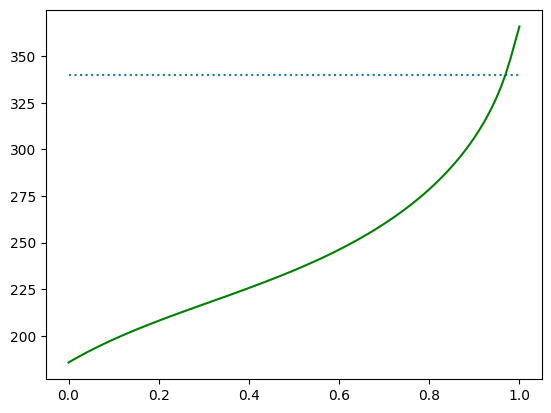

In [133]:
import matplotlib.pyplot as plt
xss = np.linspace(0,1,100)
ronaldo = Q_xs(xss)[0]

plt.plot(xss,1360/4*np.ones(len(xss)), ls="dotted")
plt.plot(xss, ronaldo, color = "green")

print(np.arcsin(xss[np.argmin(np.abs(ronaldo - 1360/4))])*180/np.pi)


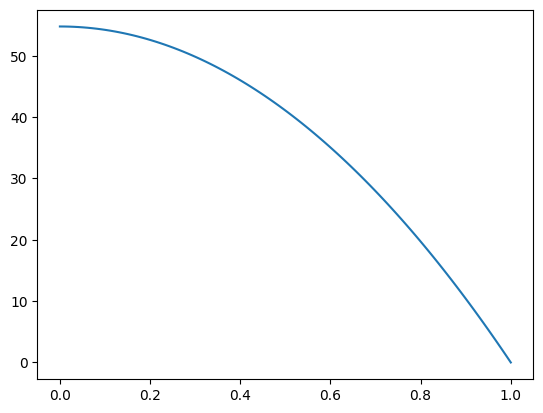

In [134]:

messi = Q_xs(xss)[1]
plt.plot(xss, messi[:][93])